In [15]:
import numpy as np

class GridWorldEnv:
    def __init__(self, grid_size=(5, 5)):
        self.grid_size = grid_size
        self.state = None
        self.done = False
        self.rewards_map = np.random.randint(-1, 2, size=grid_size)  # Random rewards in the range [-1, 1]

    def reset(self):
        self.state = (0, 0)  # Start at the top-left corner
        self.done = False
        return self.state

    def step(self, action):
        # Define actions: 0=up, 1=down, 2=left, 3=right
        row, col = self.state

        if action == 0 and row > 0:    # Move up
            row -= 1
        elif action == 1 and row < self.grid_size[0] - 1:  # Move down
            row += 1
        elif action == 2 and col > 0:  # Move left
            col -= 1
        elif action == 3 and col < self.grid_size[1] - 1:  # Move right
            col += 1

        self.state = (row, col)
        reward = self.rewards_map[row, col]

        # End the episode if we reach the bottom-right corner
        self.done = (row == self.grid_size[0] - 1 and col == self.grid_size[1] - 1)

        return self.state, reward, self.done, {}

# Running an Episode
def run_episode(env):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = np.random.choice(4)  # Random action selection for simplicity
        next_state, reward, done, _ = env.step(action)
        total_reward += reward

    return total_reward

# Create the grid environment
env = GridWorldEnv()

# Run multiple episodes and collect returns
n_episodes = 10
returns = []

for _ in range(n_episodes):
    episode_return = run_episode(env)
    returns.append(episode_return)

print("Returns from each episode:", returns)


Returns from each episode: [12, 1, -30, 23, -8, 6, 1, -9, -1, -3]


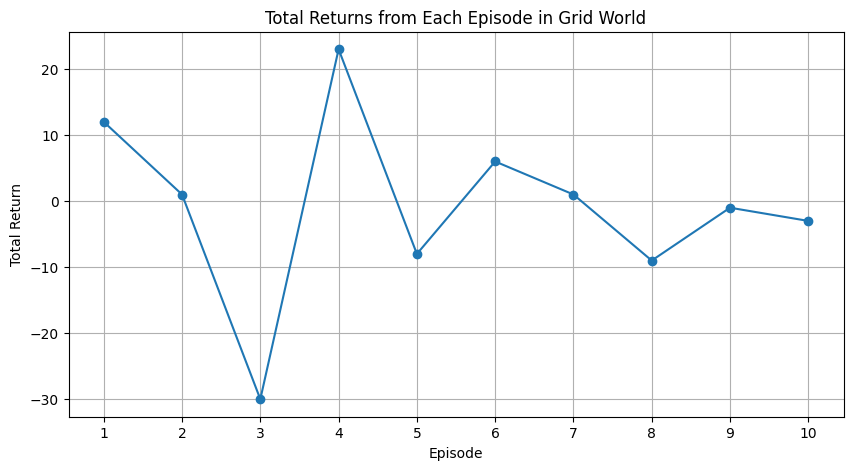

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_episodes + 1), returns, marker='o')
plt.title('Total Returns from Each Episode in Grid World')
plt.xlabel('Episode')
plt.ylabel('Total Return')
plt.xticks(range(1, n_episodes + 1))
plt.grid()
plt.show()
